# Exploratory Analysis - Jordan
## Stats 131 Project 

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("movie_metadata.csv")

In [3]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
movies.title_year.unique()

array([2009., 2007., 2015., 2012.,   nan, 2010., 2016., 2006., 2008.,
       2013., 2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003.,
       2001., 2002., 1998., 2000., 1990., 1991., 1994., 1996., 1982.,
       1993., 1979., 1992., 1989., 1984., 1988., 1978., 1962., 1980.,
       1972., 1981., 1968., 1985., 1940., 1963., 1987., 1986., 1973.,
       1983., 1976., 1977., 1970., 1971., 1969., 1960., 1965., 1964.,
       1927., 1974., 1937., 1975., 1967., 1951., 1961., 1946., 1953.,
       1954., 1959., 1932., 1947., 1956., 1945., 1952., 1930., 1966.,
       1939., 1950., 1948., 1958., 1957., 1943., 1944., 1938., 1949.,
       1936., 1941., 1955., 1942., 1929., 1935., 1933., 1916., 1934.,
       1925., 1920.])

In [5]:
movies.shape

(5043, 28)

In [45]:
#keeping only title, genre, and budget columns 
genres_budget = movies[['title_year', 'movie_title', 'genres', 'budget','content_rating']]
genres_budget = genres_budget.dropna(axis = 0) #remove missing values
genres_budget.head()

,title_year,movie_title,genres,budget,content_rating
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13


In [46]:
genres_budget.shape

(4340, 5)

In [47]:
#only looking from after 1986
genres_budget = genres_budget.loc[genres_budget['title_year'] > 1986.0]
genres_budget.head()

,title_year,movie_title,genres,budget,content_rating
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13


In [48]:
genres_budget.shape

(3912, 5)

In [49]:
genres_budget.title_year.unique()

array([2009., 2007., 2015., 2012., 2010., 2016., 2006., 2008., 2013.,
       2011., 2014., 2005., 1997., 2004., 1999., 1995., 2003., 2001.,
       2002., 1998., 2000., 1990., 1991., 1994., 1996., 1993., 1992.,
       1989., 1988., 1987.])

In [50]:
#splitting genres string into a list
genres_budget['genres_breakdown'] = [item.split("|") for item in genres_budget.genres]
genres_budget.head()

,title_year,movie_title,genres,budget,content_rating,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]"
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13,"[Action, Adventure, Fantasy]"
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13,"[Action, Adventure, Thriller]"
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13,"[Action, Thriller]"
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13,"[Action, Adventure, Sci-Fi]"


In [51]:
#number of genre categories each movie is in
genres_budget['genres_amt'] = [len(item) for item in genres_budget.genres_breakdown]
genres_budget.head()

,title_year,movie_title,genres,budget,content_rating,genres_breakdown,genres_amt
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",4
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13,"[Action, Adventure, Fantasy]",3
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13,"[Action, Adventure, Thriller]",3
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13,"[Action, Thriller]",2
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13,"[Action, Adventure, Sci-Fi]",3


In [52]:
#dividing movie budget among each of its genre categories
genres_budget['split_budget'] = genres_budget.budget / genres_budget.genres_amt
genres_budget.head()

,title_year,movie_title,genres,budget,content_rating,genres_breakdown,genres_amt,split_budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",4,5.925000e+07
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13,"[Action, Adventure, Fantasy]",3,1.000000e+08
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13,"[Action, Adventure, Thriller]",3,8.166667e+07
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13,"[Action, Thriller]",2,1.250000e+08
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13,"[Action, Adventure, Sci-Fi]",3,8.790000e+07


In [53]:
s = genres_budget.apply(lambda x: pd.Series(x['genres_breakdown']), axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genres_breakdown'
yearly_breakdown = genres_budget.drop('genres_breakdown', axis = 1).join(s)
yearly_breakdown['genres_breakdown'] = pd.Series(yearly_breakdown['genres_breakdown'], dtype = object)
yearly_breakdown.head()

,title_year,movie_title,genres,budget,content_rating,genres_amt,split_budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,4,59250000.0,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,4,59250000.0,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,4,59250000.0,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,4,59250000.0,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13,3,100000000.0,Action


In [54]:
yearly_budgets = yearly_breakdown.groupby(['title_year', 'genres_breakdown'])['split_budget'].sum()
yearly_budgets = yearly_budgets.unstack('genres_breakdown')
yearly_budgets = yearly_budgets.fillna(0.0) 
#turning budgets into ratios by year 
yearly_budgets['total'] = yearly_budgets.sum(axis = 1)
yearly_budgets

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,total
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,4.810833e+07,4.606667e+07,3.833333e+05,2.275000e+07,5.144167e+07,2.990833e+07,0.000000e+00,5.232500e+07,1.230000e+07,1.128333e+07,...,3.833333e+05,0.000000e+00,0.0,9.966667e+06,2.356667e+07,0.000000e+00,6.145000e+07,3.250000e+06,0.000000e+00,4.195500e+08
1988.0,4.144083e+08,2.518333e+07,3.708333e+08,2.750000e+05,5.461667e+07,1.935000e+07,0.000000e+00,9.630833e+07,7.766667e+06,3.037500e+07,...,2.166667e+06,1.175000e+06,0.0,2.626667e+07,3.752667e+08,2.750000e+05,5.479167e+07,1.575000e+07,2.600000e+06,1.517900e+09
1989.0,9.052500e+07,9.582500e+07,0.000000e+00,6.166667e+06,7.819167e+07,3.850000e+07,1.600000e+05,7.152500e+07,2.500000e+06,2.550000e+07,...,0.000000e+00,4.750000e+06,0.0,1.383333e+07,4.406667e+07,8.833333e+06,7.724167e+07,1.816667e+07,0.000000e+00,6.058600e+08
1990.0,1.776667e+08,6.900000e+07,0.000000e+00,8.333333e+06,8.715833e+07,6.733333e+07,0.000000e+00,8.207500e+07,3.900000e+07,4.641667e+07,...,0.000000e+00,6.666667e+06,0.0,4.657500e+07,9.783333e+07,2.000000e+07,8.141667e+07,0.000000e+00,2.133333e+07,9.392250e+08
1991.0,1.274333e+08,8.150000e+07,0.000000e+00,9.500000e+06,9.801150e+07,5.532500e+07,0.000000e+00,1.019615e+08,2.662500e+07,5.212500e+07,...,9.500000e+06,0.000000e+00,0.0,3.620833e+07,6.900000e+07,0.000000e+00,6.480833e+07,8.750000e+06,4.600000e+06,7.804730e+08
1992.0,1.484847e+08,3.133333e+07,4.000000e+06,1.991667e+07,8.973333e+07,4.387640e+07,0.000000e+00,1.529097e+08,1.490000e+07,4.240000e+07,...,6.400000e+06,4.166667e+06,0.0,7.707640e+07,3.506667e+07,1.583333e+07,7.254307e+07,8.000000e+06,7.200000e+06,8.574070e+08
1993.0,8.385000e+07,1.002417e+08,5.600000e+06,2.683333e+07,9.089167e+07,5.483333e+07,0.000000e+00,1.759167e+08,3.852500e+07,7.386667e+07,...,0.000000e+00,3.258333e+07,0.0,6.753333e+07,5.544167e+07,4.616667e+06,1.067667e+08,8.333333e+06,4.166667e+06,9.624000e+08
1994.0,1.739500e+08,8.968333e+07,9.000000e+06,1.960000e+07,2.860800e+08,1.582833e+08,2.333333e+05,2.588667e+08,7.116667e+07,8.033333e+07,...,9.000000e+06,2.508333e+07,0.0,6.100000e+07,2.025000e+07,2.333333e+05,2.038667e+08,7.500000e+06,2.010000e+07,1.537730e+09
1995.0,3.468333e+08,2.524571e+08,1.385714e+07,6.950000e+07,1.828083e+08,1.411333e+08,0.000000e+00,3.511155e+08,5.552381e+07,8.645000e+07,...,7.857143e+06,3.325000e+07,0.0,1.239988e+08,8.443333e+07,0.000000e+00,3.072500e+08,3.425000e+07,1.066667e+07,2.194425e+09


In [55]:
#turning budgets into ratios (by year) 
budget_ratio = yearly_budgets.loc[:, 'Action':'Western'].div(yearly_budgets['total'], axis = 0)
budget_ratio

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,0.114667,0.109800,0.000914,0.054225,0.122612,0.071287,0.000000,0.124717,0.029317,0.026894,...,0.029476,0.000914,0.000000,0.000000,0.023756,0.056171,0.000000,0.146466,0.007746,0.000000
1988.0,0.273014,0.016591,0.244307,0.000181,0.035982,0.012748,0.000000,0.063448,0.005117,0.020011,...,0.000000,0.001427,0.000774,0.000000,0.017305,0.247228,0.000181,0.036097,0.010376,0.001713
1989.0,0.149416,0.158164,0.000000,0.010178,0.129059,0.063546,0.000264,0.118055,0.004126,0.042089,...,0.004126,0.000000,0.007840,0.000000,0.022833,0.072734,0.014580,0.127491,0.029985,0.000000
1990.0,0.189163,0.073465,0.000000,0.008873,0.092798,0.071690,0.000000,0.087386,0.041524,0.049420,...,0.028392,0.000000,0.007098,0.000000,0.049589,0.104164,0.021294,0.086685,0.000000,0.022714
1991.0,0.163277,0.104424,0.000000,0.012172,0.125580,0.070887,0.000000,0.130641,0.034114,0.066786,...,0.019112,0.012172,0.000000,0.000000,0.046393,0.088408,0.000000,0.083037,0.011211,0.005894
1992.0,0.173179,0.036544,0.004665,0.023229,0.104657,0.051173,0.000000,0.178340,0.017378,0.049451,...,0.018952,0.007464,0.004860,0.000000,0.089895,0.040899,0.018467,0.084608,0.009330,0.008397
1993.0,0.087126,0.104158,0.005819,0.027882,0.094443,0.056976,0.000000,0.182790,0.040030,0.076753,...,0.009005,0.000000,0.033856,0.000000,0.070172,0.057608,0.004797,0.110938,0.008659,0.004329
1994.0,0.113121,0.058322,0.005853,0.012746,0.186040,0.102933,0.000152,0.168343,0.046280,0.052242,...,0.000000,0.005853,0.016312,0.000000,0.039669,0.013169,0.000152,0.132576,0.004877,0.013071
1995.0,0.158052,0.115045,0.006315,0.031671,0.083306,0.064314,0.000000,0.160003,0.025302,0.039395,...,0.001481,0.003581,0.015152,0.000000,0.056506,0.038476,0.000000,0.140014,0.015608,0.004861


In [17]:
#checking ratios (should all be 1) 
budget_ratio.sum(axis = 1)

title_year
1987.0    1.0
1988.0    1.0
1989.0    1.0
1990.0    1.0
1991.0    1.0
1992.0    1.0
1993.0    1.0
1994.0    1.0
1995.0    1.0
1996.0    1.0
1997.0    1.0
1998.0    1.0
1999.0    1.0
2000.0    1.0
2001.0    1.0
2002.0    1.0
2003.0    1.0
2004.0    1.0
2005.0    1.0
2006.0    1.0
2007.0    1.0
2008.0    1.0
2009.0    1.0
2010.0    1.0
2011.0    1.0
2012.0    1.0
2013.0    1.0
2014.0    1.0
2015.0    1.0
2016.0    1.0
dtype: float64

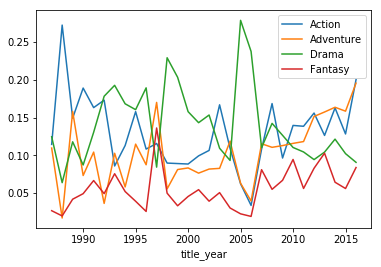

In [18]:
#results['BMXLEG'].plot(label = "leg length")
budget_ratio['Action'].plot(label = "Action")
budget_ratio['Adventure'].plot(label = "Adventure")
budget_ratio['Drama'].plot(label = "Drama")
budget_ratio['Fantasy'].plot(label = "Fantasy")
plt.legend()

# JT attempt May 20

In [19]:
yearly_breakdown.head()

,title_year,movie_title,genres,budget,genres_amt,split_budget,genres_breakdown
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Action
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Adventure
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Fantasy
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,4,59250000.0,Sci-Fi
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,3,100000000.0,Action


In [20]:
#creates array of genres

import numpy as np
genres_col = movies.iloc[:,9]
#print(genres_col)
#dtype(genres_col)
np.dtype(genres_col) #Python objects
first_line = genres_col.iloc[0,]
first_line
str(first_line).split("|")
#print(np.shape(genres_col))

genres_breakdown1 = str(genres_col).split("|")
#print(genres_breakdown)

#unpacks genres
genre_breakdown = [str(genres_col.iloc[i,]).split("|") for i in range(0,5043)]
np.shape(genre_breakdown)
#outputs first 5 lines of genre breakdown. Each line corresponds to a movie.
genre_breakdown[0:5] 

#creates array of all genre types
genres = ['Action']

for x in range(0,len(genre_breakdown)):
    for i in range(0,len(genre_breakdown[x])):
        if genre_breakdown[x][i] not in genres:
            genres.append(genre_breakdown[x][i])
print(genres)
print(len(genres)) #26 genre types

['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Thriller', 'Documentary', 'Romance', 'Animation', 'Comedy', 'Family', 'Musical', 'Mystery', 'Western', 'Drama', 'History', 'Sport', 'Crime', 'Horror', 'War', 'Biography', 'Music', 'Game-Show', 'Reality-TV', 'News', 'Short', 'Film-Noir']
26


Text(0.5,1,'Frequency of Movies Based on Genre and Year')

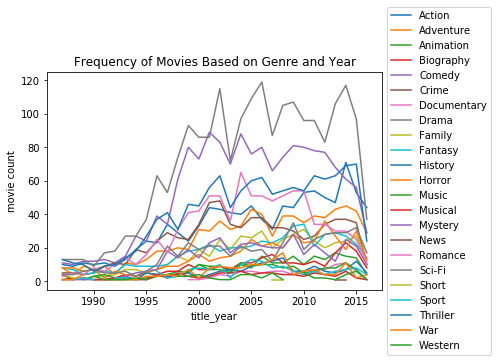

In [21]:
#plot of frequency of genre types each year

genre_count_by_yr = yearly_breakdown.groupby(['title_year','genres_breakdown']).count()['movie_title'].unstack()
import matplotlib.pyplot as plt
x = genre_count_by_yr.plot()
x.legend(loc='center left', bbox_to_anchor=(1, 0.5))
x.set_ylabel('movie count')
x.set_title('Frequency of Movies Based on Genre and Year')

In [22]:
genre_count_by_yr = yearly_breakdown.groupby(['title_year','genres_breakdown']).count()['movie_title'].unstack()
genre_count_by_yr.head()

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
1987.0,10.0,8.0,1.0,4.0,11.0,5.0,NaN,13.0,4.0,8.0,...,1.0,NaN,NaN,3.0,4.0,NaN,NaN,13.0,1.0,NaN
1988.0,9.0,4.0,2.0,1.0,10.0,5.0,NaN,13.0,2.0,7.0,...,1.0,1.0,NaN,5.0,4.0,NaN,1.0,11.0,1.0,1.0
1989.0,11.0,9.0,NaN,2.0,12.0,4.0,1.0,13.0,1.0,4.0,...,NaN,1.0,NaN,4.0,6.0,NaN,2.0,10.0,4.0,NaN
1990.0,10.0,7.0,NaN,1.0,12.0,5.0,NaN,9.0,3.0,5.0,...,1.0,1.0,NaN,8.0,7.0,1.0,1.0,6.0,NaN,3.0
1991.0,11.0,9.0,NaN,1.0,13.0,9.0,NaN,17.0,3.0,6.0,...,1.0,NaN,NaN,6.0,5.0,NaN,NaN,9.0,1.0,1.0


Text(0.5,1,'Proportion of Movies of Each Genre Each Year')

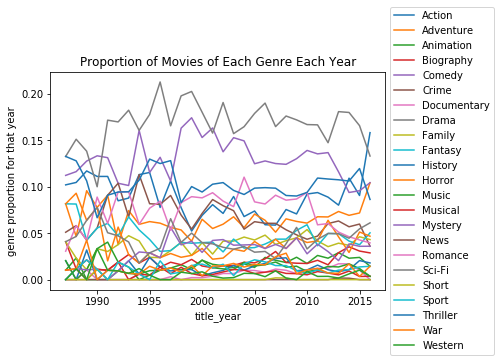

In [23]:
#creates and plots dataframe of proportion of each genre each year
genre_count_by_yr[np.isnan(genre_count_by_yr)]=0
row_sum = genre_count_by_yr.sum(axis=1)
genre_prop = genre_count_by_yr.div(row_sum, axis=0)
y = genre_prop.plot()
y.legend(loc='center left', bbox_to_anchor=(1, 0.5))
y.set_ylabel('genre proportion for that year')
y.set_title('Proportion of Movies of Each Genre Each Year')

In [33]:
genre_count_by_yr.sum().sort_values()

genres_breakdown
News              2.0
Short             3.0
Western          61.0
Musical          89.0
Documentary      94.0
Sport           151.0
War             157.0
History         159.0
Music           164.0
Animation       218.0
Biography       250.0
Mystery         413.0
Horror          451.0
Family          475.0
Sci-Fi          498.0
Fantasy         516.0
Crime           759.0
Adventure       770.0
Romance         908.0
Action         1001.0
Thriller       1223.0
Comedy         1578.0
Drama          2072.0
dtype: float64

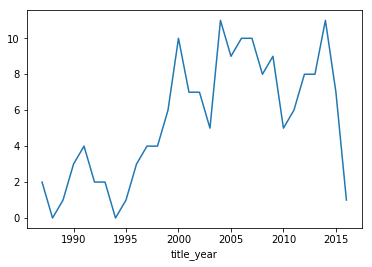

In [36]:
genre_count_by_yr.Music.plot()

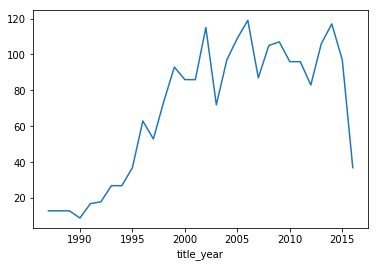

In [37]:
genre_count_by_yr.Drama.plot()

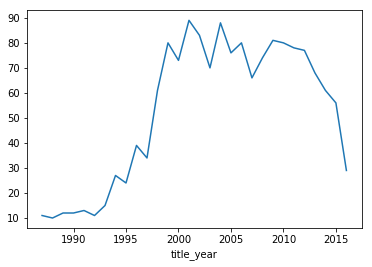

In [38]:
genre_count_by_yr.Comedy.plot()

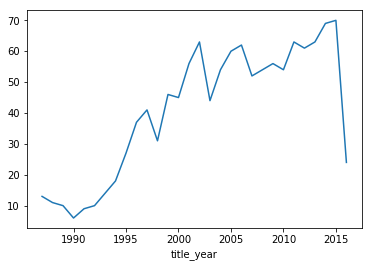

In [40]:
genre_count_by_yr.Thriller.plot()

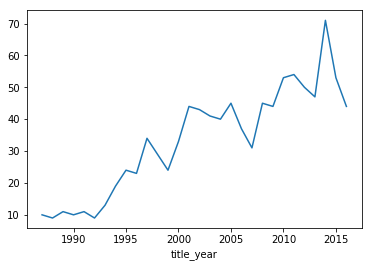

In [41]:
genre_count_by_yr.Action.plot()

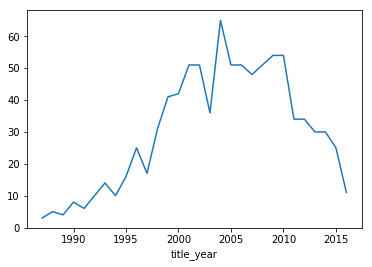

In [42]:
genre_count_by_yr.Romance.plot()

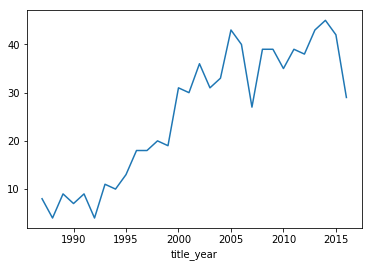

In [43]:
genre_count_by_yr.Adventure.plot()

In [44]:
genre_count_by_yr.tail()

genres_breakdown,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
title_year,,,,,,,,,,,,,,,,,,,,,
2012.0,50.0,38.0,13.0,9.0,77.0,34.0,7.0,83.0,20.0,28.0,...,4.0,17.0,0.0,34.0,28.0,0.0,4.0,61.0,4.0,2.0
2013.0,47.0,43.0,17.0,17.0,68.0,37.0,10.0,106.0,23.0,29.0,...,3.0,12.0,1.0,30.0,29.0,0.0,6.0,63.0,4.0,1.0
2014.0,71.0,45.0,15.0,23.0,61.0,37.0,11.0,117.0,24.0,27.0,...,6.0,25.0,1.0,30.0,29.0,0.0,7.0,69.0,11.0,4.0
2015.0,53.0,42.0,14.0,18.0,56.0,35.0,6.0,97.0,27.0,22.0,...,2.0,21.0,0.0,25.0,32.0,0.0,8.0,70.0,2.0,6.0
2016.0,44.0,29.0,4.0,8.0,29.0,10.0,0.0,37.0,12.0,14.0,...,1.0,10.0,0.0,11.0,17.0,0.0,4.0,24.0,4.0,1.0


In [79]:
content_rating_yearly = yearly_breakdown[['title_year','budget','content_rating','split_budget','genres_breakdown']].groupby(['title_year','content_rating']).count()['genres_breakdown'].unstack()
content_rating_yearly.head()

content_rating,G,NC-17,Not Rated,PG,PG-13,R,TV-14,TV-G,TV-PG,Unrated,X
title_year,,,,,,,,,,,
1987.0,NaN,NaN,6.0,23.0,14.0,47.0,NaN,NaN,NaN,NaN,8.0
1988.0,3.0,NaN,NaN,12.0,8.0,60.0,NaN,NaN,NaN,NaN,NaN
1989.0,NaN,NaN,NaN,21.0,22.0,45.0,NaN,NaN,NaN,NaN,6.0
1990.0,NaN,NaN,NaN,20.0,33.0,32.0,NaN,NaN,NaN,NaN,NaN
1991.0,NaN,NaN,NaN,20.0,23.0,56.0,NaN,NaN,NaN,NaN,NaN


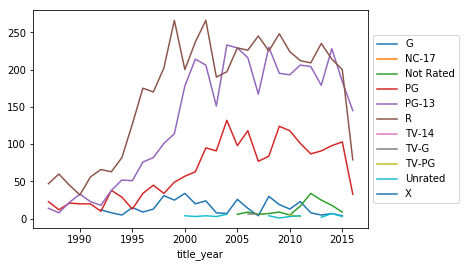

In [71]:
plot2 = content_rating_yearly.plot()
plot2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [80]:
movies.loc[movies.movie_title=='']
#minimum threshold for totaly budget tally
#don't mess with inflation

#maybe pick a few fav actors/movie series
#top grossing actresses on imdb
genres_budget

,title_year,movie_title,genres,budget,content_rating,genres_breakdown,genres_amt,split_budget
0,2009.0,Avatar,Action|Adventure|Fantasy|Sci-Fi,237000000.0,PG-13,"[Action, Adventure, Fantasy, Sci-Fi]",4,5.925000e+07
1,2007.0,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,300000000.0,PG-13,"[Action, Adventure, Fantasy]",3,1.000000e+08
2,2015.0,Spectre,Action|Adventure|Thriller,245000000.0,PG-13,"[Action, Adventure, Thriller]",3,8.166667e+07
3,2012.0,The Dark Knight Rises,Action|Thriller,250000000.0,PG-13,"[Action, Thriller]",2,1.250000e+08
5,2012.0,John Carter,Action|Adventure|Sci-Fi,263700000.0,PG-13,"[Action, Adventure, Sci-Fi]",3,8.790000e+07
6,2007.0,Spider-Man 3,Action|Adventure|Romance,258000000.0,PG-13,"[Action, Adventure, Romance]",3,8.600000e+07
7,2010.0,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,260000000.0,PG,"[Adventure, Animation, Comedy, Family, Fantasy...",7,3.714286e+07
8,2015.0,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,250000000.0,PG-13,"[Action, Adventure, Sci-Fi]",3,8.333333e+07
9,2009.0,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery,250000000.0,PG,"[Adventure, Family, Fantasy, Mystery]",4,6.250000e+07
10,2016.0,Batman v Superman: Dawn of Justice,Action|Adventure|Sci-Fi,250000000.0,PG-13,"[Action, Adventure, Sci-Fi]",3,8.333333e+07


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


In [98]:
movies.loc[movies.movie_title=='Avatar']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes


# Attempt at extracting rows based on movies for top actresses based on Chen's advice

In [112]:
credits = pd.read_csv("credits.csv")
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [110]:
actor_status = "Tom Hanks" in credits['cast'][i]

True

In [116]:
actor_status = "Tom Hanks" in credits['cast'][i]
["Tom Hanks" in credits['cast'][i] for i in range(0,10)]

[True, False, False, False, False, False, False, False, False, False]

In [117]:
credits['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [118]:
"director" in credits['cast'][0]

False

In [121]:
"producer" in credits['cast'][0]
len(credits['cast'])

45476

In [123]:
scarlett = ["Scarlett Johansson" in credits['cast'][i] for i in range(0,45476)]

In [124]:
sum(scarlett)

51

In [179]:
scarlett_movie_ids = credits['id'][scarlett]
scarlett_movie_ids

116       10324
253        9061
500       31586
837       88224
1503      37567
1627       9714
1645        547
4512       1548
4607      37920
4751      10778
5344       8869
6562        153
6998       3635
7105      13505
8247      11836
9546       1901
9549       9953
10221      1635
10576     15184
10585       116
11121       512
11276      9676
11354      1124
12017     12435
12424     12184
12855      5038
12921      8285
13381     10184
15153     10138
17818     24428
17943     67273
18291     74465
19927    112336
21189     81167
21697    138697
22167    152601
22979     97370
23052    100402
23357    240832
23378    212778
26526     73257
26571     99861
26580    271110
31402    278927
33545    270487
41258    299969
41259    259910
41699    335797
42320    315837
42481    407588
43701    397422
Name: id, dtype: int64

In [2]:
movies2 = pd.read_csv("movies_metadata.csv")
movies2.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [192]:
scarlett_str = scarlett_movie_ids.astype('str')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
116,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,10324,tt0116606,en,If Lucy Fell,Joe and Lucy are roommates and best friends. L...,...,1996-03-08,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A comedy for the romantically challenged.,If Lucy Fell,False,5.4,11.0


In [219]:
#df_new = [movies2.loc[movies2.id==scarlett_str.iloc[i]] for i in range(0,len(scarlett_str))]
#movies2.loc[movies2.id==scarlett_str.iloc[[0],[1]]

SyntaxError: unexpected EOF while parsing (<ipython-input-219-2aff654ca780>, line 2)

In [209]:
scarlett_movie_ids

116       10324
253        9061
500       31586
837       88224
1503      37567
1627       9714
1645        547
4512       1548
4607      37920
4751      10778
5344       8869
6562        153
6998       3635
7105      13505
8247      11836
9546       1901
9549       9953
10221      1635
10576     15184
10585       116
11121       512
11276      9676
11354      1124
12017     12435
12424     12184
12855      5038
12921      8285
13381     10184
15153     10138
17818     24428
17943     67273
18291     74465
19927    112336
21189     81167
21697    138697
22167    152601
22979     97370
23052    100402
23357    240832
23378    212778
26526     73257
26571     99861
26580    271110
31402    278927
33545    270487
41258    299969
41259    259910
41699    335797
42320    315837
42481    407588
43701    397422
Name: id, dtype: int64

# June 4th attempt

In [4]:
movies2['in_series']= movies2.belongs_to_collection.isna()==False

In [6]:
in_series_df = movies2.loc[movies2.in_series==True]

In [7]:
in_series_df.shape

(4494, 25)

In [22]:
#in_series_df.groupby('belongs_to_collection').sum().revenue.sort_values(ascending=False)


belongs_to_collection
{'id': 1241, 'name': 'Harry Potter Collection', 'poster_path': '/8Xmkc1HvCOpMlbFvVabrtr6HAsp.jpg', 'backdrop_path': '/wfnMt6LGqYHcNyOfsuusw5lX3bL.jpg'}                           7.707367e+09
{'id': 10, 'name': 'Star Wars Collection', 'poster_path': '/ghd5zOQnDaDW1mxO7R5fXXpZMu.jpg', 'backdrop_path': '/d8duYyyC9J5T825Hg7grmaabfxQ.jpg'}                                 7.434495e+09
{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}                               7.106970e+09
{'id': 9485, 'name': 'The Fast and the Furious Collection', 'poster_path': '/mCkqJf4ijbNoBWvJ0RTWZJuhJUA.jpg', 'backdrop_path': '/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg'}               5.125099e+09
{'id': 295, 'name': 'Pirates of the Caribbean Collection', 'poster_path': '/zT5UKFhq9nk97VGlBbAxlAK8UFN.jpg', 'backdrop_path': '/cnKAGbX1rDkAquF2V1wVkptHDJO.jpg'}                4.521577e+09
{'id': 8650, 'name': 'T

In [50]:
top_30_series= in_series_df.groupby('belongs_to_collection', as_index=False).sum().iloc[:,[0,1]].sort_values('revenue', ascending=False).reset_index().iloc[:30,:]

In [54]:
in_series_df.groupby('belongs_to_collection', as_index=False).sum().iloc[:,[0,1]].sort_values('revenue', ascending=False)
top_30_series

,index,belongs_to_collection,revenue
0,199,"{'id': 1241, 'name': 'Harry Potter Collection'...",7.707367e+09
1,3,"{'id': 10, 'name': 'Star Wars Collection', 'po...",7.434495e+09
2,1481,"{'id': 645, 'name': 'James Bond Collection', '...",7.106970e+09
3,1641,"{'id': 9485, 'name': 'The Fast and the Furious...",5.125099e+09
4,840,"{'id': 295, 'name': 'Pirates of the Caribbean ...",4.521577e+09
5,1551,"{'id': 8650, 'name': 'Transformers Collection'...",4.366101e+09
6,1529,"{'id': 86066, 'name': 'Despicable Me Collectio...",3.691070e+09
7,957,"{'id': 33514, 'name': 'The Twilight Collection...",3.342107e+09
8,1506,"{'id': 8354, 'name': 'Ice Age Collection', 'po...",3.216709e+09
9,931,"{'id': 328, 'name': 'Jurassic Park Collection'...",3.031484e+09


In [58]:
import ast

top_30_series['series_name'] = 0
for i in range(0, len(top_30_series)):
    temp = top_30_series.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    top_30_series.series_name.iloc[i] = temp['name']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [60]:
top_30_series.head()


,index,belongs_to_collection,revenue,series_name
0,199,"{'id': 1241, 'name': 'Harry Potter Collection'...",7.707367e+09,Harry Potter Collection
1,3,"{'id': 10, 'name': 'Star Wars Collection', 'po...",7.434495e+09,Star Wars Collection
2,1481,"{'id': 645, 'name': 'James Bond Collection', '...",7.106970e+09,James Bond Collection
3,1641,"{'id': 9485, 'name': 'The Fast and the Furious...",5.125099e+09,The Fast and the Furious Collection
4,840,"{'id': 295, 'name': 'Pirates of the Caribbean ...",4.521577e+09,Pirates of the Caribbean Collection


In [68]:
top_30_series_array = top_30_series.series_name
top_30_series_array
s = '|'
top_30_series_array_string = s.join(top_30_series_array)
top_30_series_array_string


'Harry Potter Collection|Star Wars Collection|James Bond Collection|The Fast and the Furious Collection|Pirates of the Caribbean Collection|Transformers Collection|Despicable Me Collection|The Twilight Collection|Ice Age Collection|Jurassic Park Collection|Shrek Collection|The Hunger Games Collection|The Hobbit Collection|The Avengers Collection|The Lord of the Rings Collection|X-Men Collection|Avatar Collection|Mission: Impossible Collection|Spider-Man Collection|The Dark Knight Collection|Iron Man Collection|Madagascar Collection|Captain America Collection|Indiana Jones Collection|Finding Nemo Collection|Toy Story Collection|The Terminator Collection|Kung Fu Panda Collection|Men In Black Collection|The Bourne Collection'

In [92]:
in_series_df.head()

movies_top_30_series_df = in_series_df[in_series_df['belongs_to_collection'].str.contains(top_30_series_array_string)]
# data frame of movies that belong to the top 30 grossing series
movies_top_30_series_df = movies_top_30_series_df[['belongs_to_collection','budget','id','production_companies','release_date','revenue','original_title','runtime','vote_average','vote_count' ]]
movies_top_30_series_df.reset_index()

for i in range(0,len(movies_top_30_series_df)):
    movies_top_30_series_df.budget.iloc[i] = float(movies_top_30_series_df.budget.iloc[i])
    
movies_top_30_series_df.head() 

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0


In [85]:
movies_top_30_series_df['series_name'] = 0
for i in range(0, len(movies_top_30_series_df)):
    temp = movies_top_30_series_df.belongs_to_collection.iloc[i]
    temp = ast.literal_eval(temp)
    movies_top_30_series_df.series_name.iloc[i] = temp['name']
    
movies_top_30_series_df.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,belongs_to_collection,budget,id,production_companies,release_date,revenue,original_title,runtime,vote_average,vote_count,series_name
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,862,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1995-10-30,373554033.0,Toy Story,81.0,7.7,5415.0,Toy Story Collection
9,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,710,"[{'name': 'United Artists', 'id': 60}, {'name'...",1995-11-16,352194034.0,GoldenEye,130.0,6.6,1194.0,James Bond Collection
256,"{'id': 10, 'name': 'Star Wars Collection', 'po...",11000000,11,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twe...",1977-05-25,775398007.0,Star Wars,121.0,8.1,6778.0,Star Wars Collection
475,"{'id': 328, 'name': 'Jurassic Park Collection'...",63000000,329,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",1993-06-11,920100000.0,Jurassic Park,127.0,7.6,4956.0,Jurassic Park Collection
582,"{'id': 528, 'name': 'The Terminator Collection...",100000000,280,"[{'name': 'Lightstorm Entertainment', 'id': 57...",1991-07-01,520000000.0,Terminator 2: Judgment Day,137.0,7.7,4274.0,The Terminator Collection


In [93]:
movies_top_30_series_df.corr()

,budget,revenue,runtime,vote_average,vote_count
budget,1.000000,0.662870,0.430648,0.109523,0.484889
revenue,0.662870,1.000000,0.443525,0.319769,0.705360
runtime,0.430648,0.443525,1.000000,0.365591,0.487538
vote_average,0.109523,0.319769,0.365591,1.000000,0.543240
vote_count,0.484889,0.705360,0.487538,0.543240,1.000000


ValueError: Could not interpret input 'series_name'

In [81]:
movies_top_30_series_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
in_series                   bool
dtype: object

In [43]:
in_series_df.corr()

,revenue,runtime,vote_average,vote_count,in_series
revenue,1.000000,0.252579,0.174121,0.855054,NaN
runtime,0.252579,1.000000,0.136333,0.258756,NaN
vote_average,0.174121,0.136333,1.000000,0.224008,NaN
vote_count,0.855054,0.258756,0.224008,1.000000,NaN
in_series,NaN,NaN,NaN,NaN,NaN


In [48]:
in_series_df.groupby('belongs_to_collection', as_index=False).mean()

,belongs_to_collection,revenue,runtime,vote_average,vote_count,in_series
0,0.065736,NaN,NaN,NaN,NaN,True
1,1.931659,NaN,NaN,NaN,NaN,True
2,2.185485,NaN,NaN,NaN,NaN,True
3,"{'id': 10, 'name': 'Star Wars Collection', 'po...",9.293118e+08,133.375000,7.375000,5430.375000,True
4,"{'id': 100286, 'name': 'Elizabeth Collection',...",7.819410e+07,119.000000,6.900000,328.000000,True
5,"{'id': 100415, 'name': 'Thumbs! Collection', '...",0.000000e+00,27.500000,6.600000,12.000000,True
6,"{'id': 1006, 'name': 'Austin Powers Collection...",2.250932e+08,94.333333,6.166667,1021.333333,True
7,"{'id': 100693, 'name': '101 Dalmatians (Animat...",1.079400e+08,74.500000,6.250000,937.000000,True
8,"{'id': 100965, 'name': 'Atlantis Collection', ...",9.302686e+07,82.500000,6.050000,711.500000,True
9,"{'id': 100970, 'name': 'The Fox and the Hound ...",1.490000e+07,75.500000,6.300000,499.500000,True


In [90]:
top_series2= in_series_df.groupby('belongs_to_collection', as_index=False).sum()
top_series2
top_series2.corr()

,revenue,runtime,vote_average,vote_count,in_series
revenue,1.000000,0.352558,0.257729,0.927199,0.215949
runtime,0.352558,1.000000,0.899430,0.326233,0.915119
vote_average,0.257729,0.899430,1.000000,0.242422,0.967943
vote_count,0.927199,0.326233,0.242422,1.000000,0.192864
in_series,0.215949,0.915119,0.967943,0.192864,1.000000
